### HABERMAN SURVIVAL DATASET

OBJECTIVE:

          To predict/classify a patient survive after five years or not based on given features.
          It is binary classification problem.

#### About the Dataset:
    1.Number of datapoints = 306
    2.Number of features = 3
    3.Features information:
            a.Age of patient at time of operation.(age)
            b.Year of operation.(year)
            c.Number of nodes detected.(nodes)
    4. clss label: (status) :- 1  means patient survived afetr 5 years
                               2  means not survived.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading Haberman Cancer Survival dataset into a pandas dataframe
haberman = pd.read_csv(r'C:\Users\DELL 7240\Documents\haberman.csv')

In [3]:
#checking or looking at data 
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
#for no.of datapoints and features in dataset
print(haberman.shape)

(306, 4)


In [5]:
# to knowing the what are features in the dataset
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
#basic statistics of survived and not survived
survived = haberman.loc[haberman['status']==1]
not_survived = haberman.loc[haberman['status']==2]
survived.describe()

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [7]:
#to know the count of varies features
haberman.groupby('status').count()

,age,year,nodes
status,,,
1,225,225,225
2,81,81,81


In [8]:
#checking for basic information
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [9]:
# to know the datapoints present in each class
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

Observation:
            
            1. no.of datapoints = 306
            2. no.of features = 3
            3. no.of null points = 0
            4. Number of datapoints in class label '1' = 225
            5. Number of datapoints in class label '2' = 81
            6. Haberman dataset is a Imbalanced dataset as 74% are class '1' and remaining 26% are                    class '2'

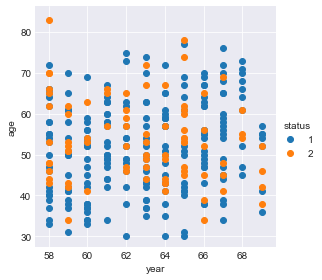

In [10]:
#scatter plot:

sns.set_style("darkgrid")
sns.FacetGrid(haberman, hue='status', size=4) \
   .map(plt.scatter, 'year', 'age') \
   .add_legend()
plt.show()
#no.of plots 3C2=3

Observation:

            7.The scatter plot between year and age is hard to distinguish the class labels.
            8.In the year 61 and the age < 55, year 67 and age<40 & age>53 and year 68 has the highest survival rate

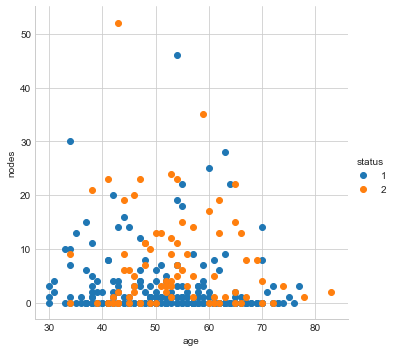

In [11]:
#scatter plot between age and nodes.
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue='status', size=5) \
   .map(plt.scatter, 'age', 'nodes') \
   .add_legend()
plt.show()

Obesrvation:

            9.age<40 and nodes<20 has survival rate is high.
            10.40<age<50 and nodes 0 has low survival rate and 50<age<60 and nodes 0 has high survival rate.
            11.no.of nodes and age placed major role.

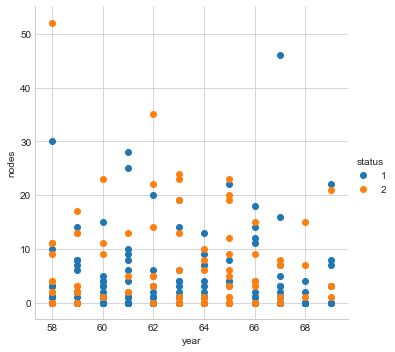

In [12]:
#scatter plot between year and nodes.
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue='status', size=5) \
   .map(plt.scatter, 'year', 'nodes') \
   .add_legend()
plt.show()

Observation:

            12.In the year 60,61 has high and 58,63 and 68 has low survival rate. 

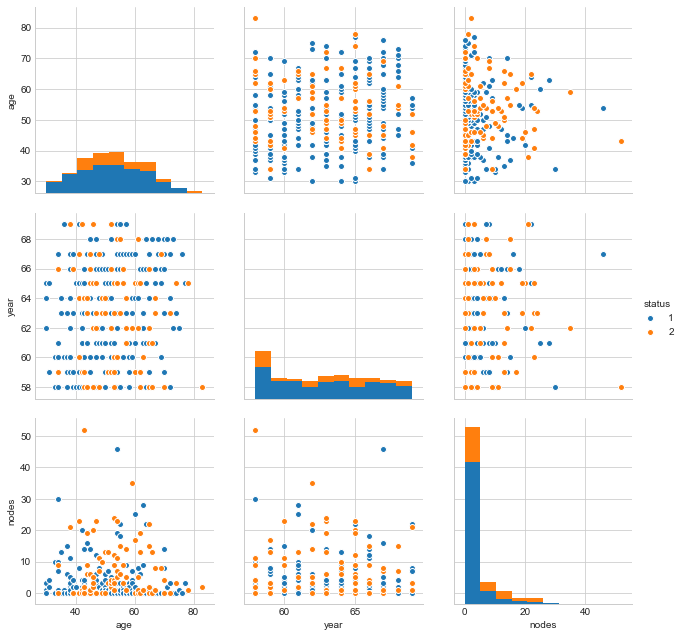

In [13]:
#pair-plots:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", vars=['age','year','nodes'], size=3);
plt.show()

Observation:

        13.class labels are not linearly separable.

Histogram, CDF and PDF

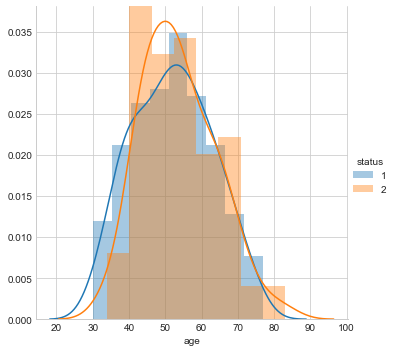

In [14]:
#Histogram, cdf and pdf are used for visualizing 1-D scatter plot for one feature.
#for age
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

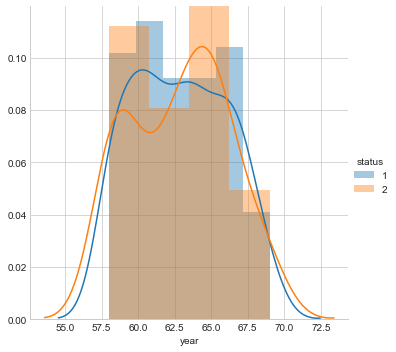

In [15]:
#year
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();


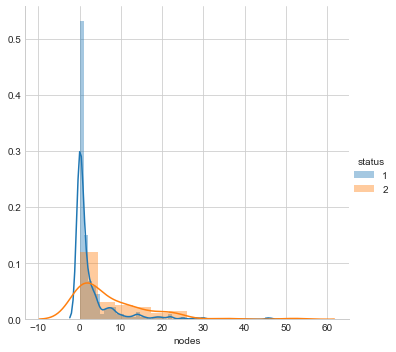

In [16]:
#nodes
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

Observation:

        14. At 0 nodes survival rate is very high.
        15. they are almost overlaped

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


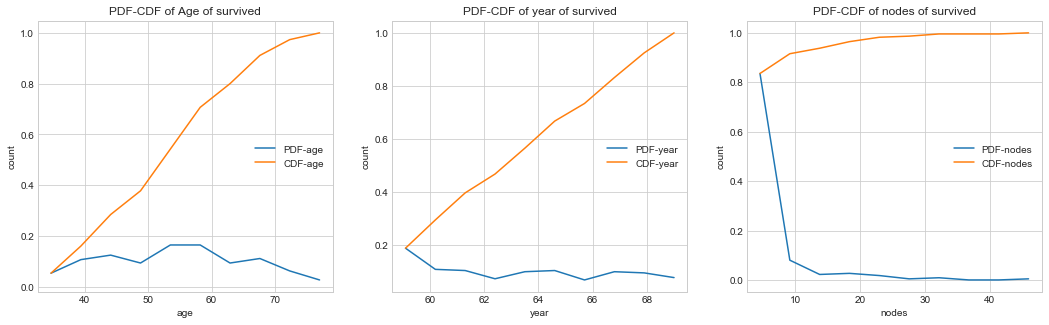

In [40]:
#pdf and cdf

#pdf and cdf of age of status is surived or 1
plt.figure(figsize=(18,5))
plt.subplot(131)
counts, bin_edges = np.histogram(survived['age'], bins=10, density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('age')
plt.ylabel("count")
plt.title('PDF-CDF of Age of survived')
plt.legend(['PDF-age', 'CDF-age'], loc = 5,prop={'size': 10})

#pdf and cdf of year of status is surived or 1
plt.subplot(132)
counts, bin_edges = np.histogram(survived['year'], bins=10, density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('year')
plt.ylabel("count")
plt.title('PDF-CDF of year of survived')
plt.legend(['PDF-year', 'CDF-year'], loc = 5,prop={'size': 10})

#pdf and cdf of nodes of status is surived or 1
plt.subplot(133)
counts, bin_edges = np.histogram(survived['nodes'], bins=10, density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('nodes')
plt.ylabel("count")
plt.title('PDF-CDF of nodes of survived')
plt.legend(['PDF-nodes', 'CDF-nodes'], loc = 5,prop={'size': 10})

plt.show()


#### Mean, variance and std-dev:

In [18]:
#Mean, Variance, Std-deviation,
print("survived:")
print("Means:")
print(np.mean(survived["age"]))
print(np.mean(survived["year"]))
print(np.mean(survived["nodes"]))

print("\nStd-dev:");
print(np.std(survived["age"]))
print(np.std(survived["year"]))
print(np.std(survived["nodes"]))

print("\nnot survived:")
print("Means:")
print(np.mean(not_survived["age"]))
print(np.mean(not_survived["year"]))
print(np.mean(not_survived["nodes"]))

print("\nStd-dev:");
print(np.std(not_survived["age"]))
print(np.std(not_survived["year"]))
print(np.std(not_survived["nodes"]))


survived:
Means:
52.01777777777778
62.86222222222222
2.7911111111111113

Std-dev:
10.98765547510051
3.2157452144021956
5.857258449412131

not survived:
Means:
53.67901234567901
62.82716049382716
7.45679012345679

Std-dev:
10.10418219303131
3.3214236255207883
9.128776076761632


#### Median, Percentile, Quantile, IQR, MAD:

In [19]:
#meadian, percentile, quantile, IQR and MAD
print("survived:")
print("Medians:")
print(np.median(survived["age"]))
print(np.median(survived["year"]))
print(np.median(survived["nodes"]))

print("\nPercentile:");
print(np.percentile(survived["age"],np.arange(0, 100, 25)))
print(np.percentile(survived["year"],np.arange(0, 100, 25)))
print(np.percentile(survived["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:");
print(np.percentile(survived["age"],90))
print(np.percentile(survived["year"],90))
print(np.percentile(survived["nodes"],90))

print("\nIQR between 75th and 25th:")
print((np.percentile(survived["age"],75)) - (np.percentile(survived["age"],25)))

from statsmodels import robust
print("\nMean Absolute Deviation:");
print(robust.mad(survived["age"]))
print(robust.mad(survived["year"]))
print(robust.mad(survived["nodes"]))


survived:
Medians:
52.0
63.0
0.0

Percentile:
[30. 43. 52. 60.]
[58. 60. 63. 66.]
[0. 0. 0. 3.]

90th Percentiles:
67.0
67.0
8.0

IQR between 75th and 25th:
17.0

Mean Absolute Deviation:
13.343419966550417
4.447806655516806
0.0


#### Box plot and Whiskers:

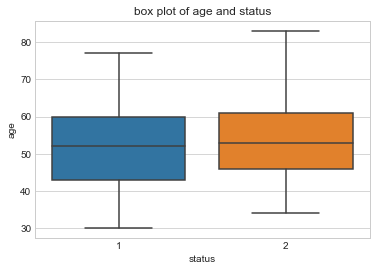

In [37]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
#box plots has 25th,50th and 75th percentiles
#box plot of age feature
sns.boxplot(x='status', y='age', data=haberman)
plt.title('box plot of age and status')
plt.show()

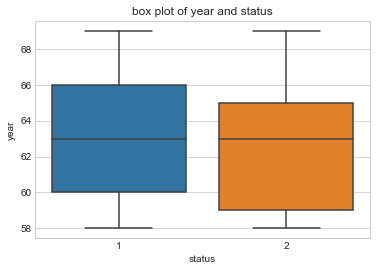

In [38]:
#boxplot of year
sns.boxplot(x='status', y='year', data=haberman)
plt.title('box plot of year and status')
plt.show()


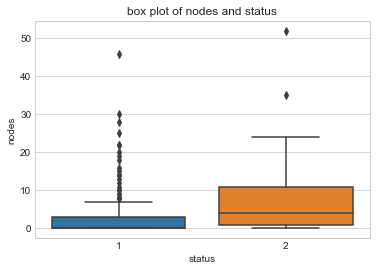

In [39]:
#boxplot of nodes
sns.boxplot(x='status', y='nodes', data=haberman)
plt.title('box plot of nodes and status')
plt.show()


Observation:

        16. Visually compare or watch the percentile values of survived and not survived

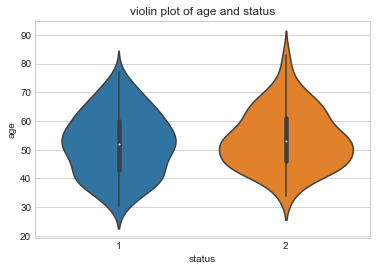

In [41]:
# violin plots are gives information both histograms(pdf) and boxplots gave.
# Denser regions of the data are fatter, and sparser ones thinner in a violin plot
#violin plot of age
sns.violinplot(x='status', y='age', data=haberman, size=8)
plt.title('violin plot of age and status')
plt.show()

Observation:

        17. age 48 to 53 has worst survival rate

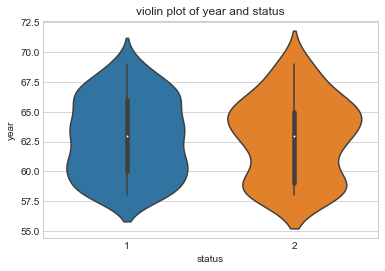

In [43]:
#violin plot of year
sns.violinplot(x='status', y='year', data=haberman, size=8)
plt.title('violin plot of year and status')
plt.show()

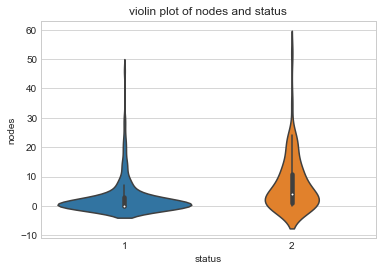

In [42]:
#violin plot of nodes
sns.violinplot(x='status', y='nodes', data=haberman, size=8)
plt.title('violin plot of nodes and status')
plt.show()

Observation:

        18. no.of nodes are less than 8 has more survived rate

#### Contour plot:

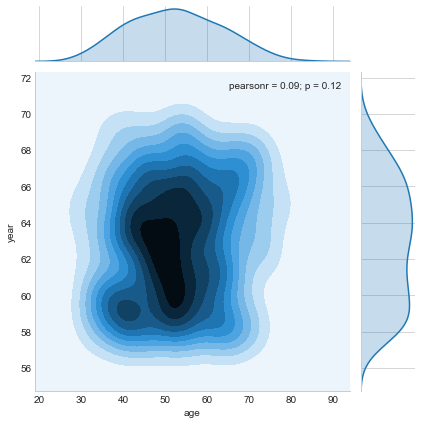

In [48]:
#its a 3d plot on 2d surface
#takes two variables
#contour plot of age and year 
sns.jointplot(x='age', y='year', data=haberman, kind='kde')
plt.show()

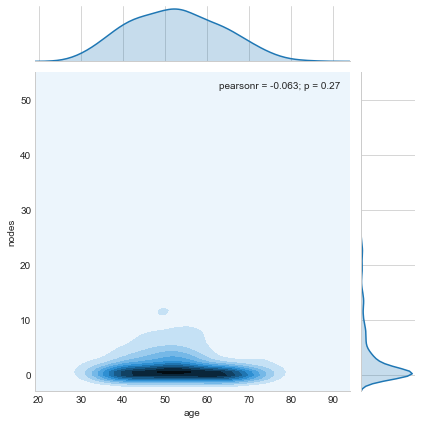

In [27]:
#contour plot of age and nodes 
sns.jointplot(x='age', y='nodes', data=haberman, kind='kde')
plt.show()


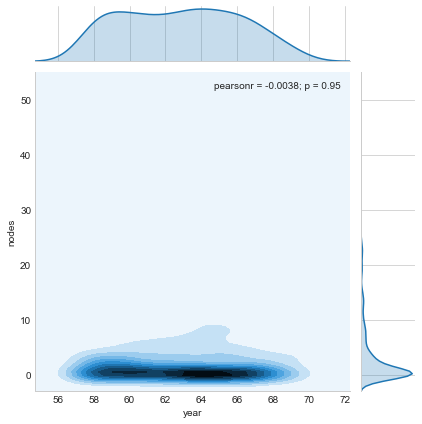

In [28]:
#contour plot of year and nodes 
sns.jointplot(x='year', y='nodes', data=haberman, kind='kde')
plt.show()

CONCLUSION:

       a.Its a binary classification problem and we have to predict the patient survive after five              years or not based on given features.
       b.Haberman dataset is a Imbalanced dataset.
       c.There are no null values in the dataset.
       d.The bivariate analysis of features tells that they overlaped more so that they are not                linearly seperable.
       e.In the year 61 and the age < 55, year 67 and age<40 & age>53 and year 68 has the highest               survival rate.
       f.The age of the patient is less than 40 and no.of nodes less than 20 has the highest survival          rate.
       g.40<age<50 and nodes 0 has low survival rate and 50<age<60 and nodes 0 has high survival rate.
       h.Overall at node is equal to 0 have survived rate high.
       i.In the year 60,61 has high and 58,63 and 68 has low survival rate.
       j.Patients age between 50 to 60 and nodes range 5 to 25 survived less.
       k.We can conclude from above analysis patients age<40 and nodes<20 have survived the most.